In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
path = '/Users/gwynethvolkmann/Desktop/datascience/Unit 11'
os.chdir(path) 

In [3]:
df = pd.read_csv('heart_failure_data.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
df.drop(columns=['time'], axis=1, inplace=True)

In [5]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  DEATH_EVENT  
0        0            1  
1        0            1  
2        1            1  
3        0            1  
4        0            1

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
DEATH_EVENT                   int64
dtype: object

In [8]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


<AxesSubplot:>

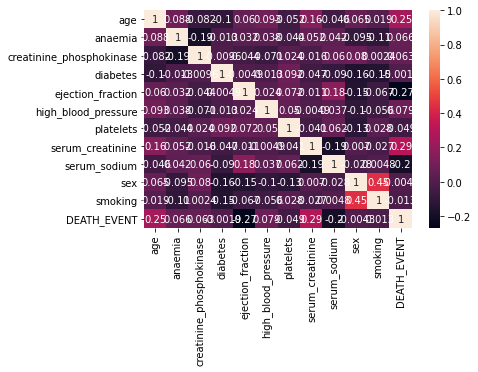

In [10]:
sns.heatmap(df.corr(), annot=True)

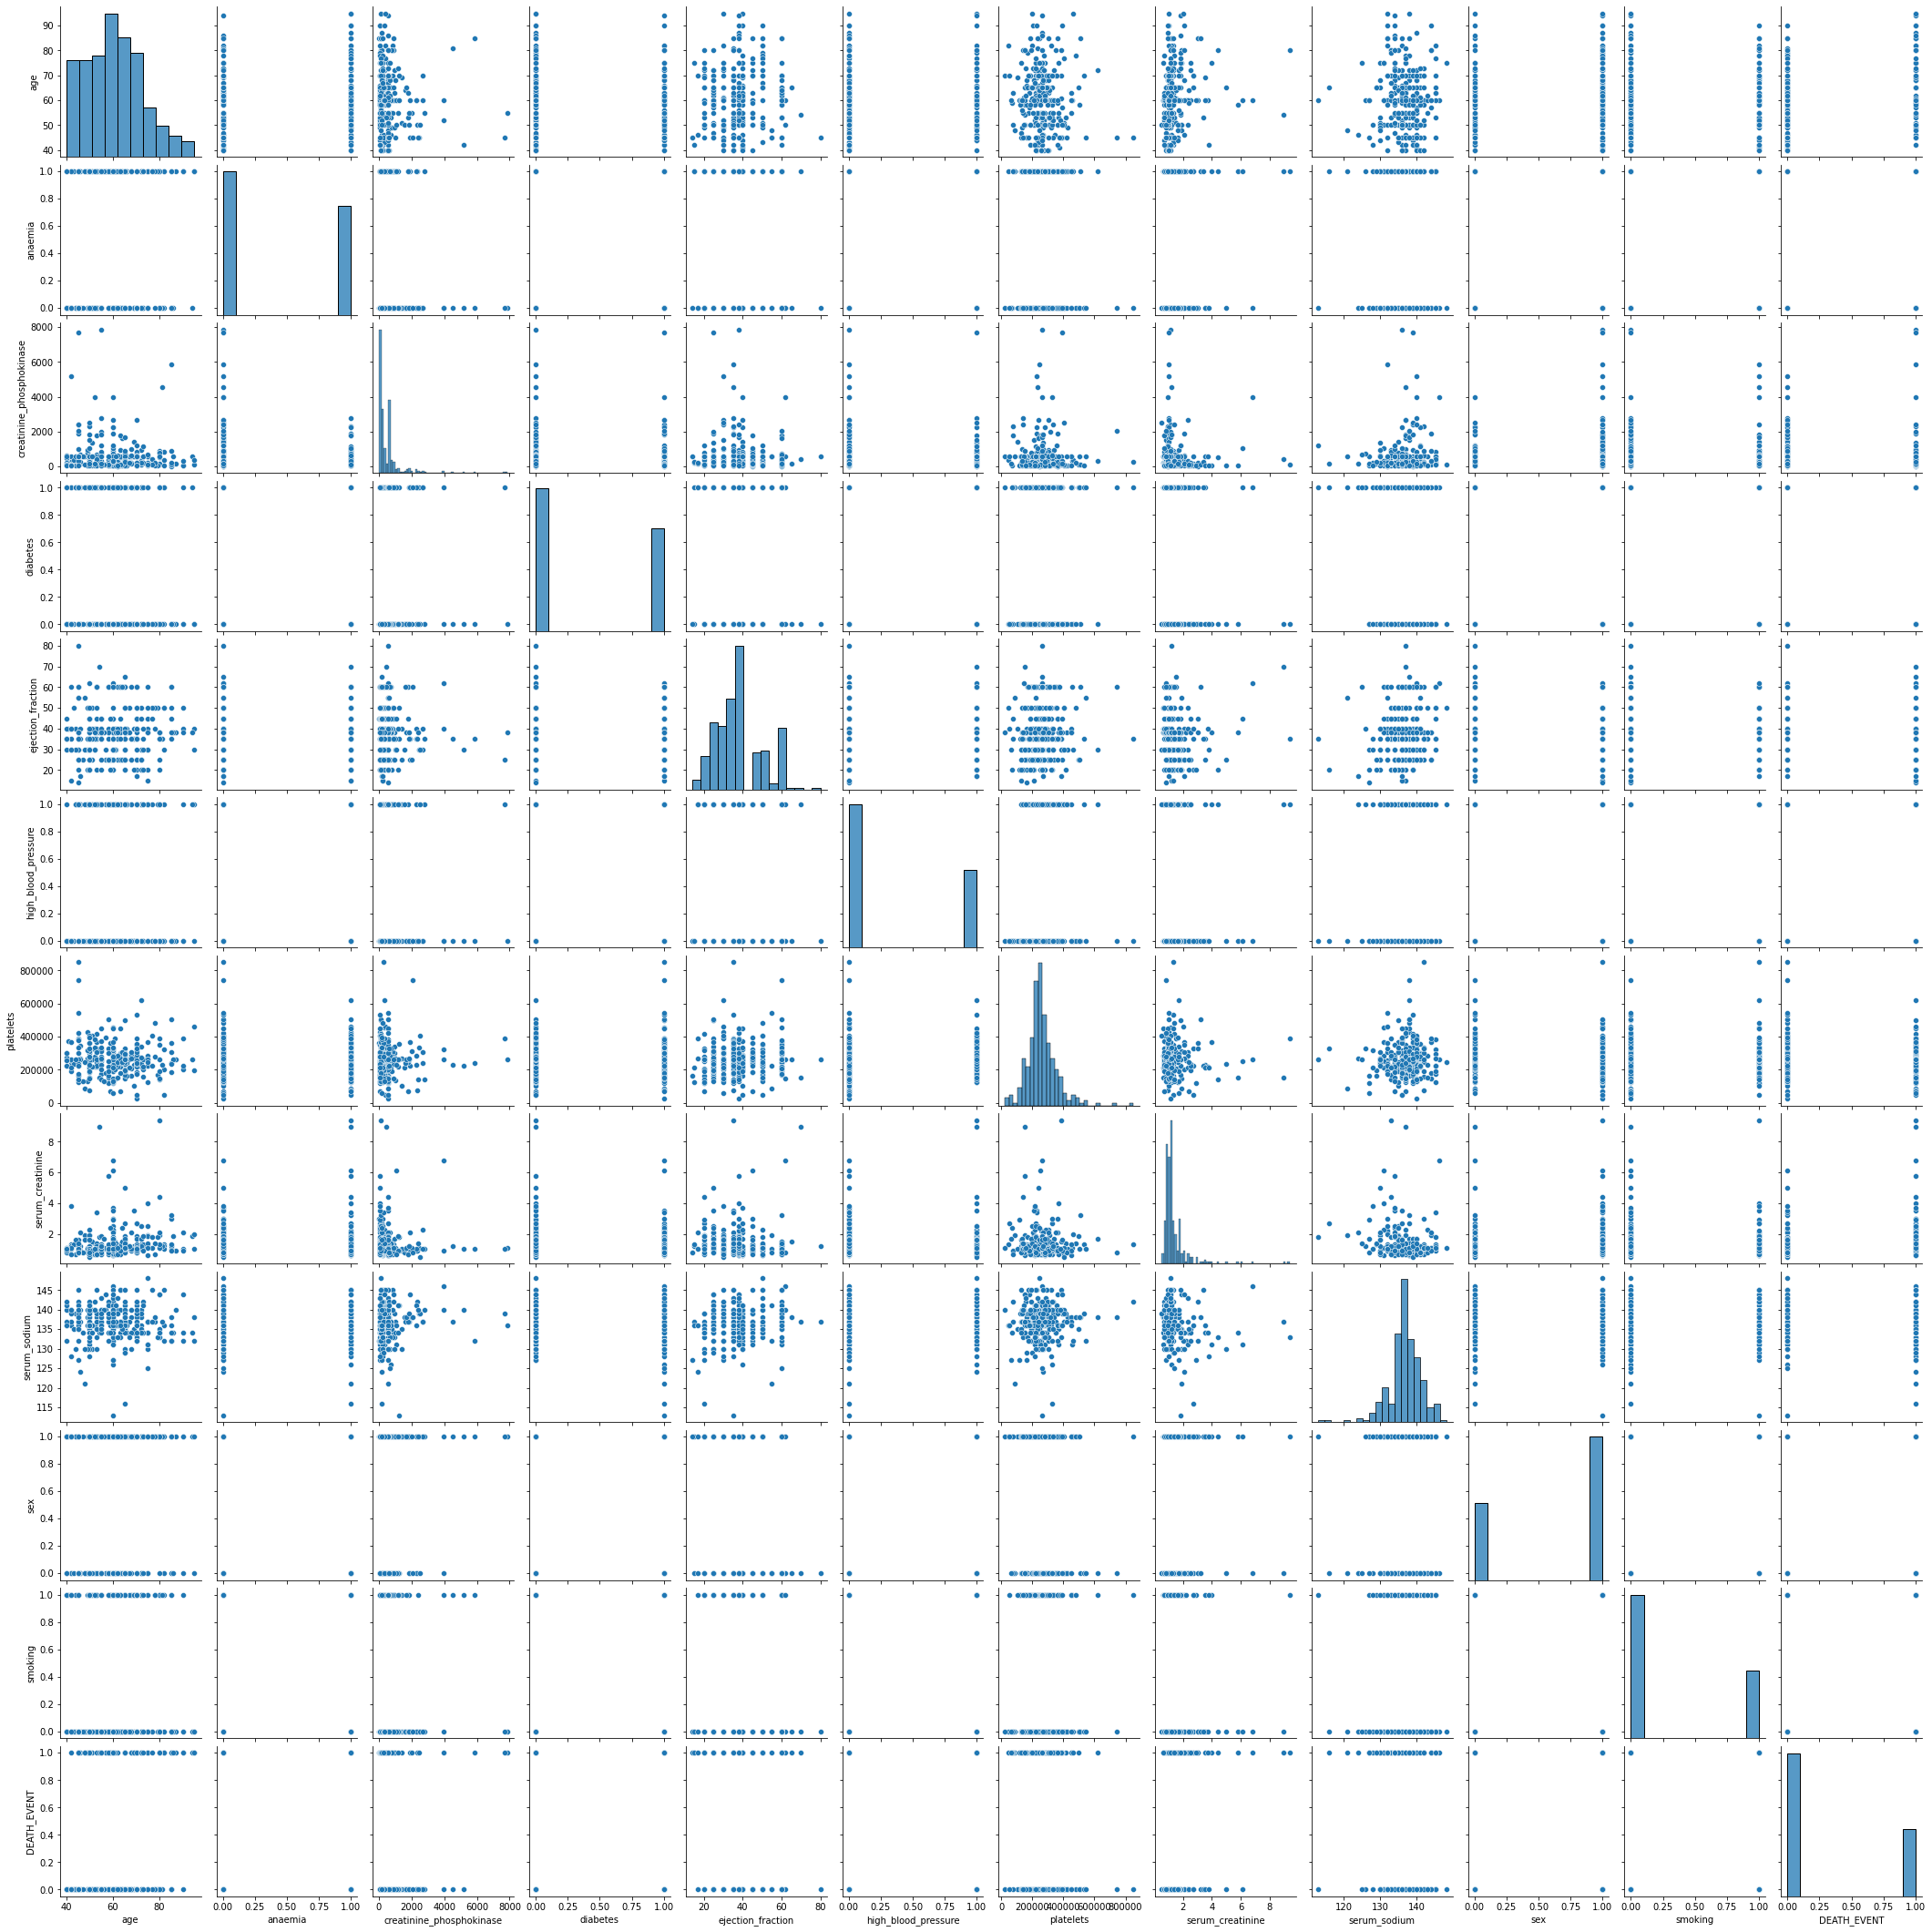

In [11]:
sns.pairplot(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>],
       [<AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'serum_sodium'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'DEATH_EVENT'}>]], dtype=object)

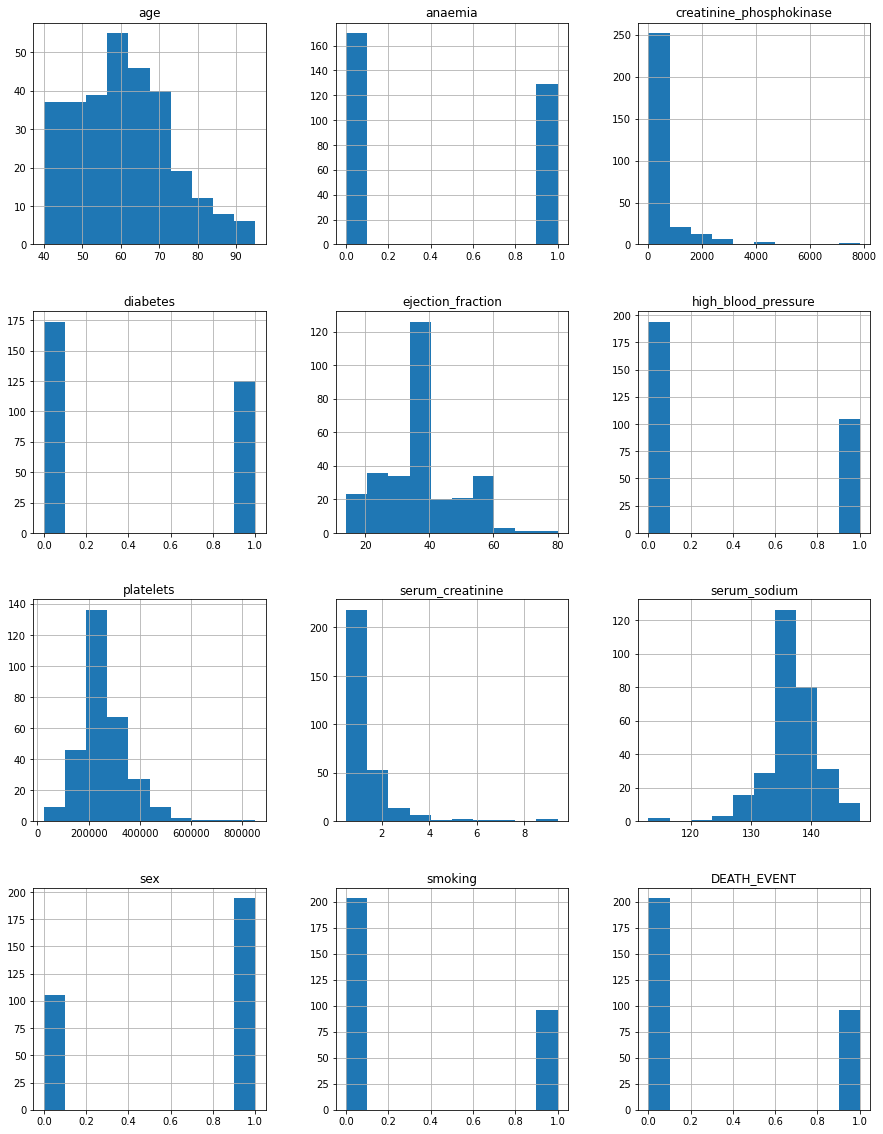

In [12]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Correlation between various features


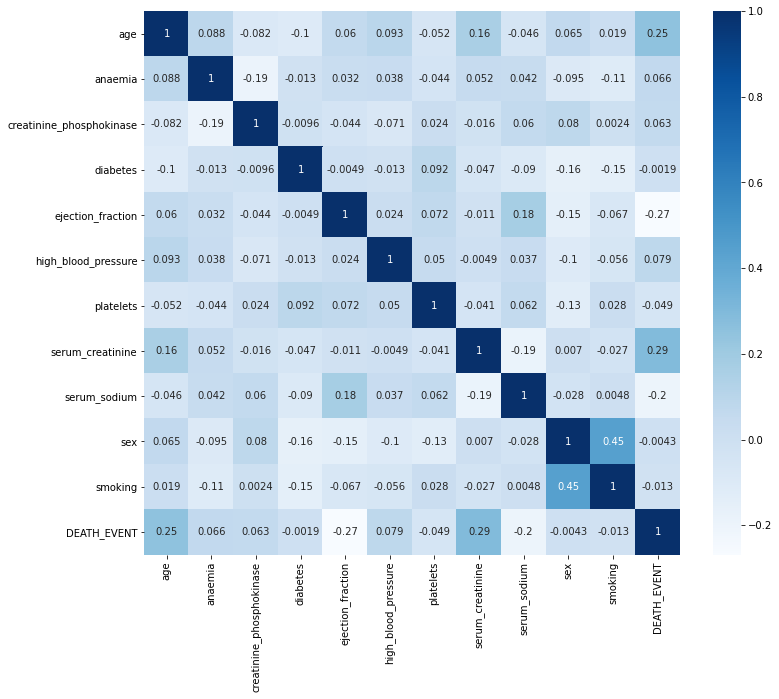

In [13]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')

The death event variable seems to be correlated with the age variable and the serum_creatinine variables most closely.

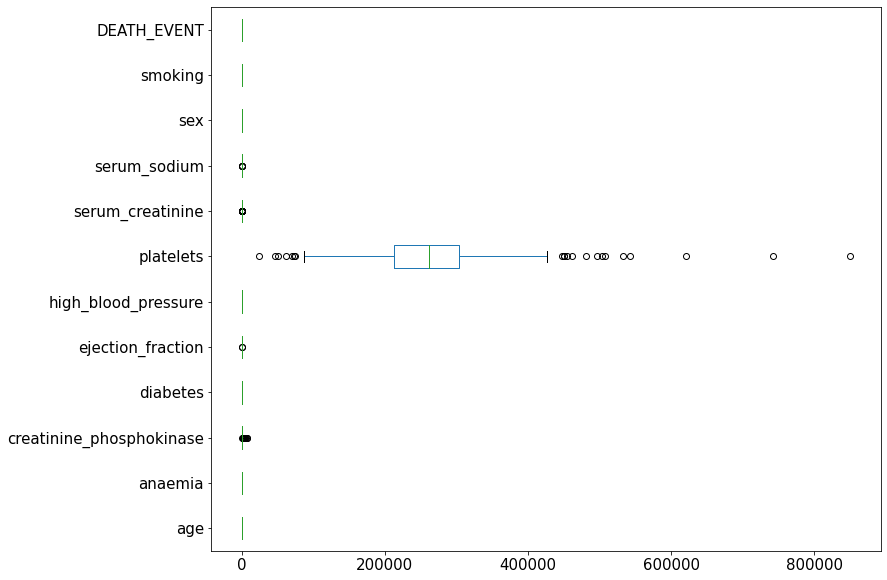

In [14]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=15, figsize=(12,10))

This box plot make it clear that the platelets variable will bee to be normalized so the data can be analyzed on 
the same scale.

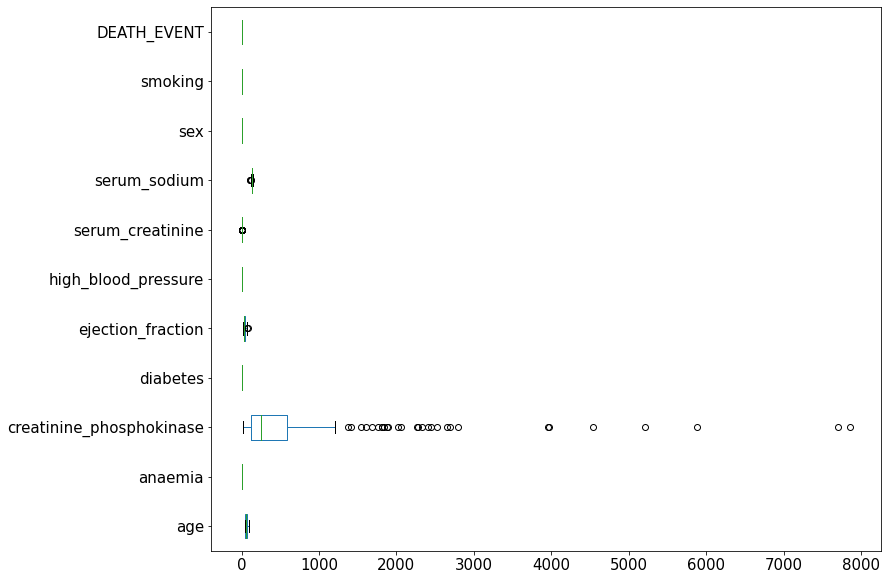

In [15]:
df2 = df.drop(['platelets'], axis=1)
boxplot = df2.boxplot(grid=False, vert=False, fontsize=15, figsize=(12,10))

The creatinine_phosphokinase variable will also need to be normalized in order to analyze data at the same scale.

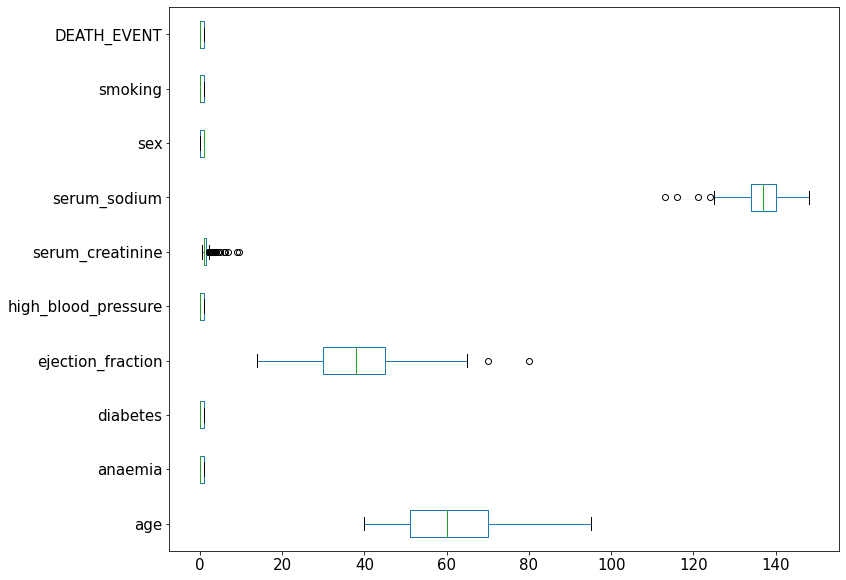

In [16]:
df3 = df2.drop(['creatinine_phosphokinase'], axis=1)
boxplot = df3.boxplot(grid=False, vert=False, fontsize=15, figsize=(12,10))

Text(0, 0.5, 'Number of patients')

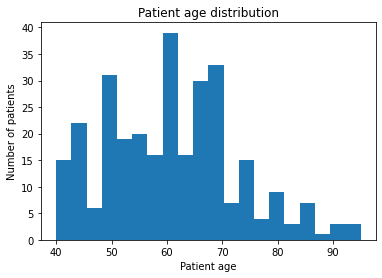

In [17]:
plt.hist(df['age'], bins=20)
plt.title('Patient age distribution')
plt.xlabel('Patient age')
plt.ylabel('Number of patients')

The number of patients is concentrated around the ages of about 40 - 68. The distribution is right skewed. 

<AxesSubplot:xlabel='age', ylabel='Count'>

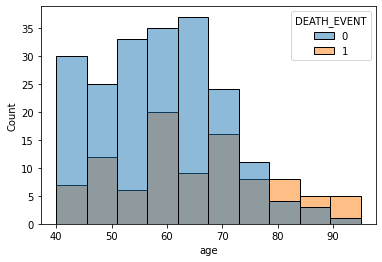

In [18]:
sns.histplot(data=df, x="age", hue="DEATH_EVENT")

From this histogram there is a higher probability of a death event as age increases. 

<AxesSubplot:xlabel='age', ylabel='Count'>

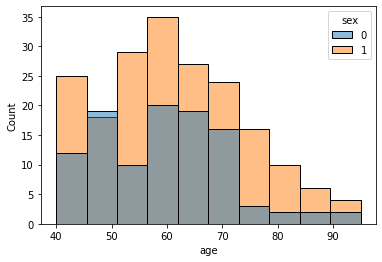

In [19]:
sns.histplot(data=df, x="age", hue="sex")

From this graph it is apparent that there were more male patients in this study than women. This makes sense 
as men experience adverse heart events more frequently than women, although since heart attack symptoms differ 
in women and have been studied less rigorously, these rates might be flexible.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

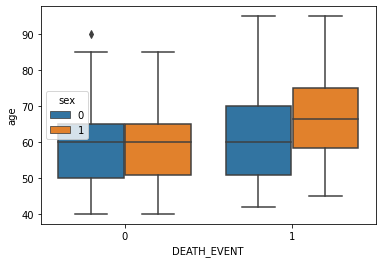

In [20]:
sns.boxplot(x= 'DEATH_EVENT', y='age', hue='sex', data = df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

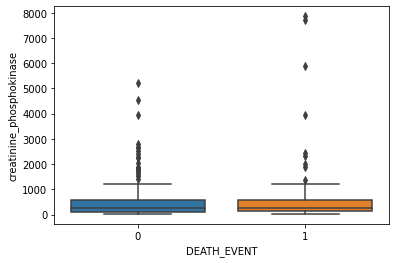

In [21]:
sns.boxplot(x= 'DEATH_EVENT', y='creatinine_phosphokinase', data = df)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

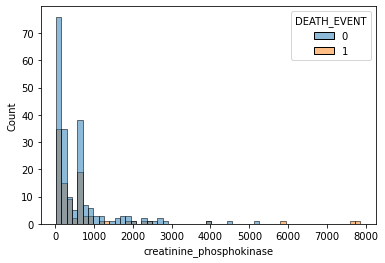

In [22]:
sns.histplot(data=df, x="creatinine_phosphokinase", hue="DEATH_EVENT")

Low levels of creatinine phosphokinase are associated more closely with patients that did not die.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

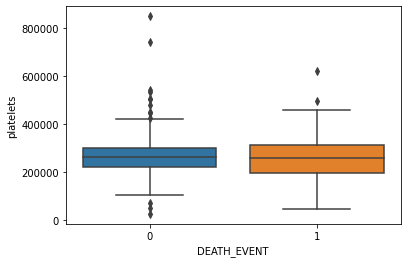

In [23]:
sns.boxplot(x= 'DEATH_EVENT', y='platelets', data = df)

<AxesSubplot:xlabel='platelets', ylabel='Count'>

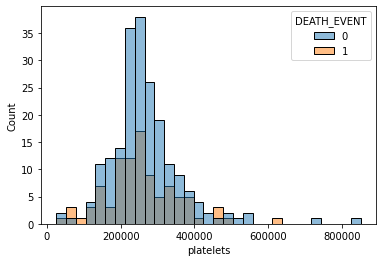

In [24]:
sns.histplot(data=df, x="platelets", hue="DEATH_EVENT")

Platelet levels do seem to differ greatly in patients that died versus patients that did not die, 
just from looking at this histogram.

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

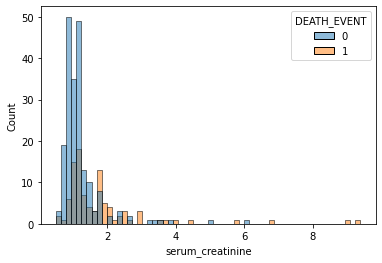

In [25]:
sns.histplot(data=df, x="serum_creatinine", hue="DEATH_EVENT")

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

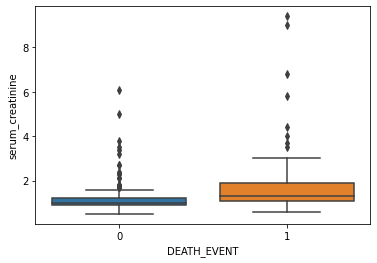

In [26]:
sns.boxplot(x= 'DEATH_EVENT', y='serum_creatinine', data = df)

You can see that serum creatinine levels are slightly higher in patients that died and there are several outliers with
very high serum creatinine levels particularly in the group that had a death event. 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

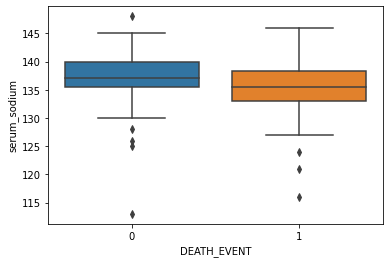

In [27]:
sns.boxplot(x= 'DEATH_EVENT', y='serum_sodium', data = df)

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

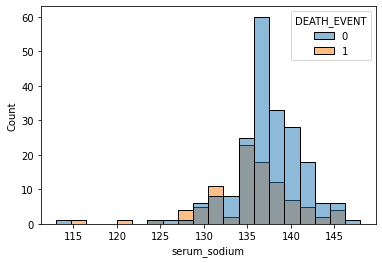

In [28]:
sns.histplot(data=df, x="serum_sodium", hue="DEATH_EVENT")

There is not a huge amount of difference in the amounts of serum sodium between patients who died and did not 
die, however it seems like serum sodium concentrations are slightly lower in patients that died.

Based on the eploratory data analysis, I am most interested in seeing how the age, serum creatinine levels, 
and ejection fraction affect the death event outcome. It appears that older patients are more likely to die, 
and older men are more likely to die than older women. Increased age seems to be associated with higher rates of 
death, lower levels of serum creatinine seem to be associated with lower rates of death, and a higher ejection 
fraction seems to be associated with lower rates of death. According to the box plot and histograms I created, 
higher levels of serum sodium may also be associated with lower rates of death I will be building several models 
to see which variables best explain the death event outcome.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
scaler.transform(df)

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01,  1.45416070e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01,  1.45416070e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00, -6.87681906e-01],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00, -6.87681906e-01]])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [31]:
y = df['DEATH_EVENT']
X = df.drop(['DEATH_EVENT'], axis=1)

In [32]:
regression_model = LogisticRegression()
regression_model.fit(X, y)
y_predicted = regression_model.predict(X)

In [33]:
print(cross_val_score(regression_model, X, y, cv=8))

[0.81578947 0.71052632 0.71052632 0.7027027  0.64864865 0.72972973
 0.81081081 0.67567568]


In [34]:
import statistics 

cv_score = cross_val_score(regression_model, X, y, cv=8)
statistics.mean(cv_score)

0.7255512091038407

In [52]:
print(regression_model.coef_)

[[ 6.22471281e-02  7.92352202e-04  2.02168162e-04  2.84590767e-05
  -6.08732057e-02  8.70742071e-04 -2.53245461e-07  6.27965384e-03
  -1.79481988e-02 -1.95514688e-04 -1.31005242e-04]]


In [54]:
log_odds = regression_model.coef_[0]
pd.DataFrame(log_odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

coef
age                       6.224713e-02
serum_creatinine          6.279654e-03
high_blood_pressure       8.707421e-04
anaemia                   7.923522e-04
creatinine_phosphokinase  2.021682e-04
diabetes                  2.845908e-05
platelets                -2.532455e-07
smoking                  -1.310052e-04
sex                      -1.955147e-04
serum_sodium             -1.794820e-02
ejection_fraction        -6.087321e-02

In [56]:
odds = np.exp(regression_model.coef_[0])  
pd.DataFrame(odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

coef
age                       1.064225
serum_creatinine          1.006299
high_blood_pressure       1.000871
anaemia                   1.000793
creatinine_phosphokinase  1.000202
diabetes                  1.000028
platelets                 1.000000
smoking                   0.999869
sex                       0.999805
serum_sodium              0.982212
ejection_fraction         0.940943

For the logistic regression model, the cross validation scores are fairly high for almost all of the folds, 
indicating that the model has correctly assigned most of the data. The smoking, sex, serum sodium, and ejection fraction are all less than one and therefore as these variables increase, the odds that there is not a death event outcome also increasese. The coefficients that seem the most highly associated with the presence of a death event outcome are age, serum creatinine and high blood pressure. The coefficients that seem most highly associated with no death event outcome are ejection fraction, serum sodium, and sex. 

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np

clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = clf.fit(X, y)

In [37]:
print(cross_val_score(clf, X, y, cv=8))

[0.78947368 0.63157895 0.73684211 0.62162162 0.83783784 0.75675676
 0.75675676 0.75675676]


In [38]:
import statistics 

cv_score2 = cross_val_score(clf, X, y, cv=8)
statistics.mean(cv_score2)

0.7359530583214794

All of the folds in the cross validation test show fairly high scores and the average score shows that this model
is performing well in asigning the data. The score is slightly higher than the logistic regression model. 

11


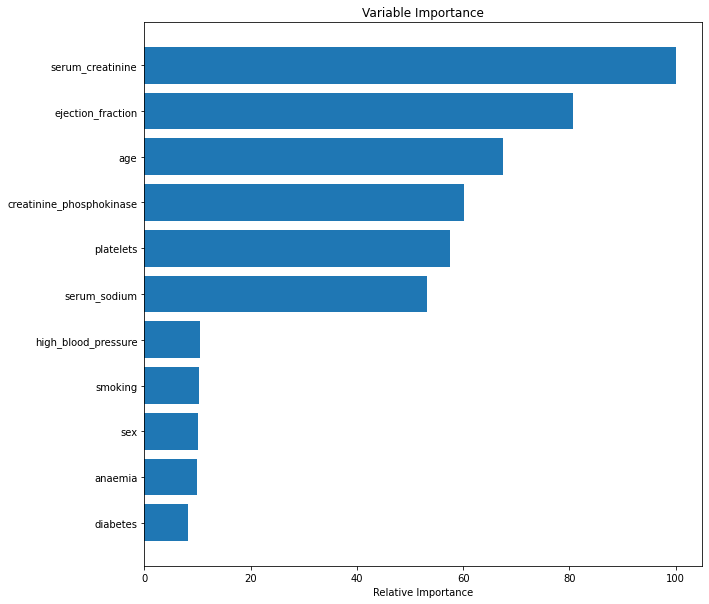

In [39]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [40]:
from sklearn.tree import DecisionTreeClassifier

entr_model = DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model.fit(X, y)
y_pred = entr_model.predict(X)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [41]:
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus

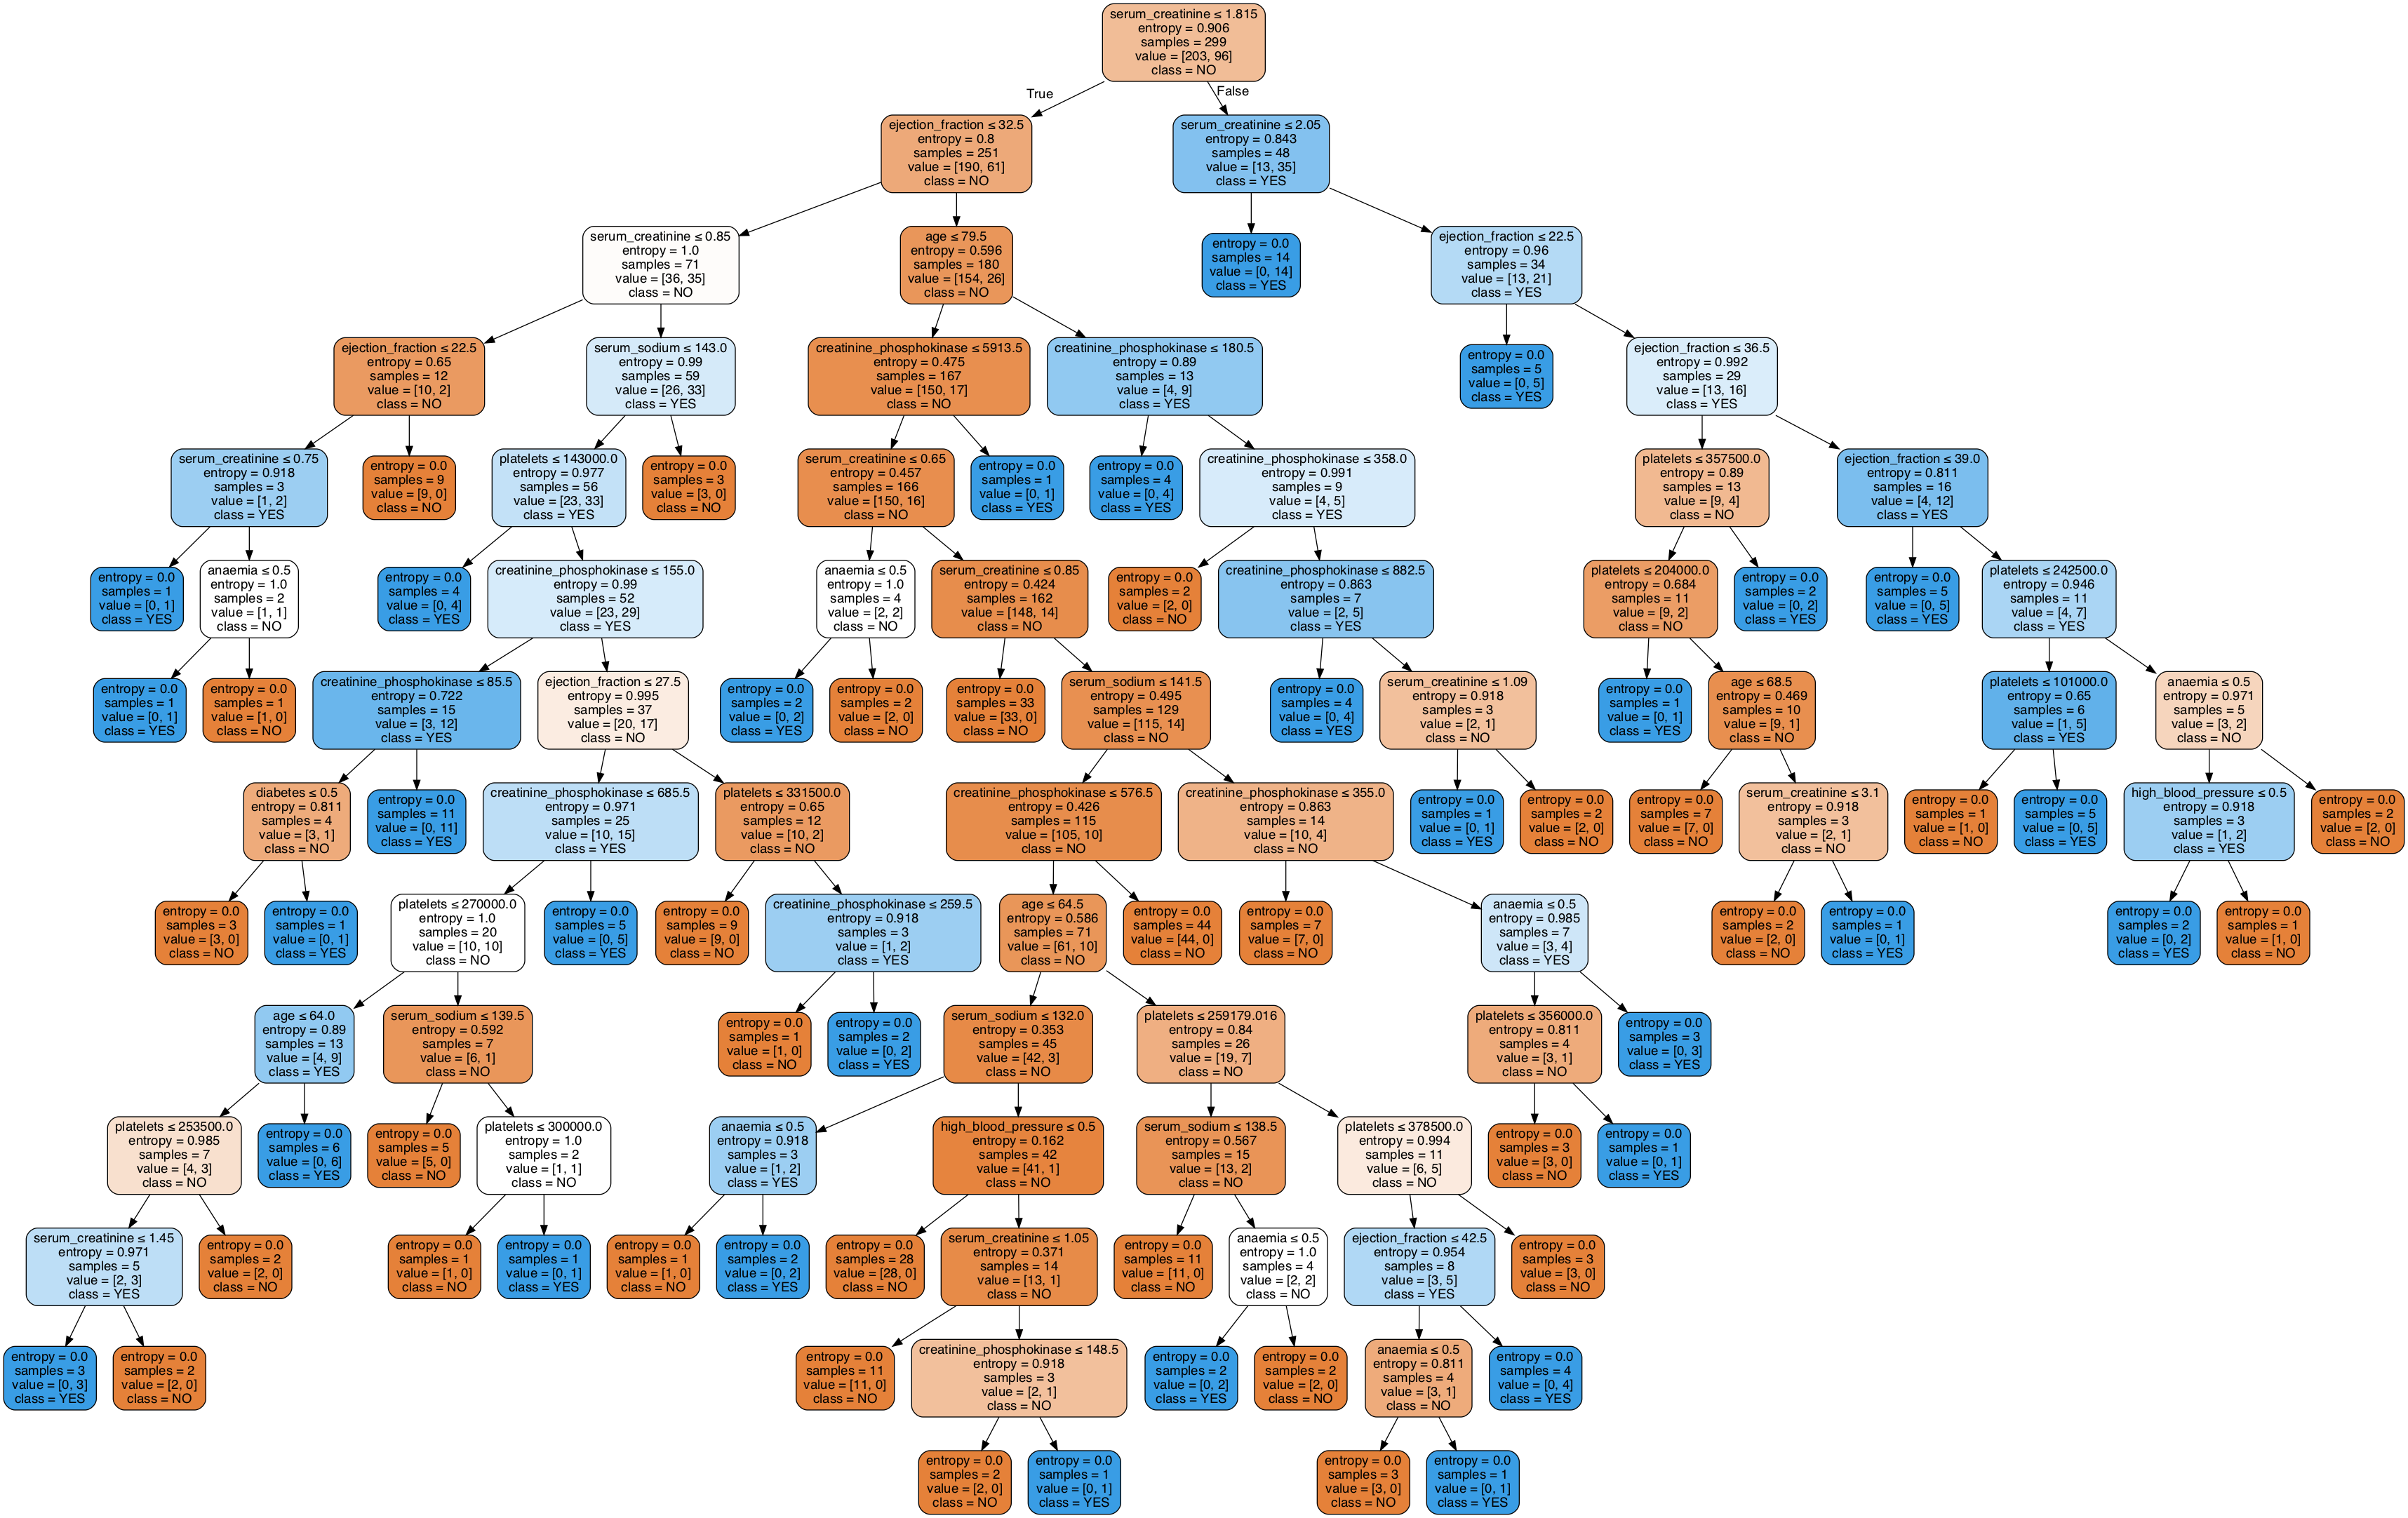

In [42]:
dot_data = StringIO()

tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [43]:
print(cross_val_score(entr_model, X, y, cv=8))

[0.71052632 0.63157895 0.68421053 0.62162162 0.67567568 0.64864865
 0.64864865 0.64864865]


In [44]:
import statistics 

cv_score3 = cross_val_score(entr_model, X, y, cv=8)
statistics.mean(cv_score3)

0.6586948790896159

The cross validation score for this model is not as high as either of the two preceding models. 

In [45]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
gini_model.fit(X, y)
y_pred = gini_model.predict(X)
y_pred = pd.Series(y_pred)
gini_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

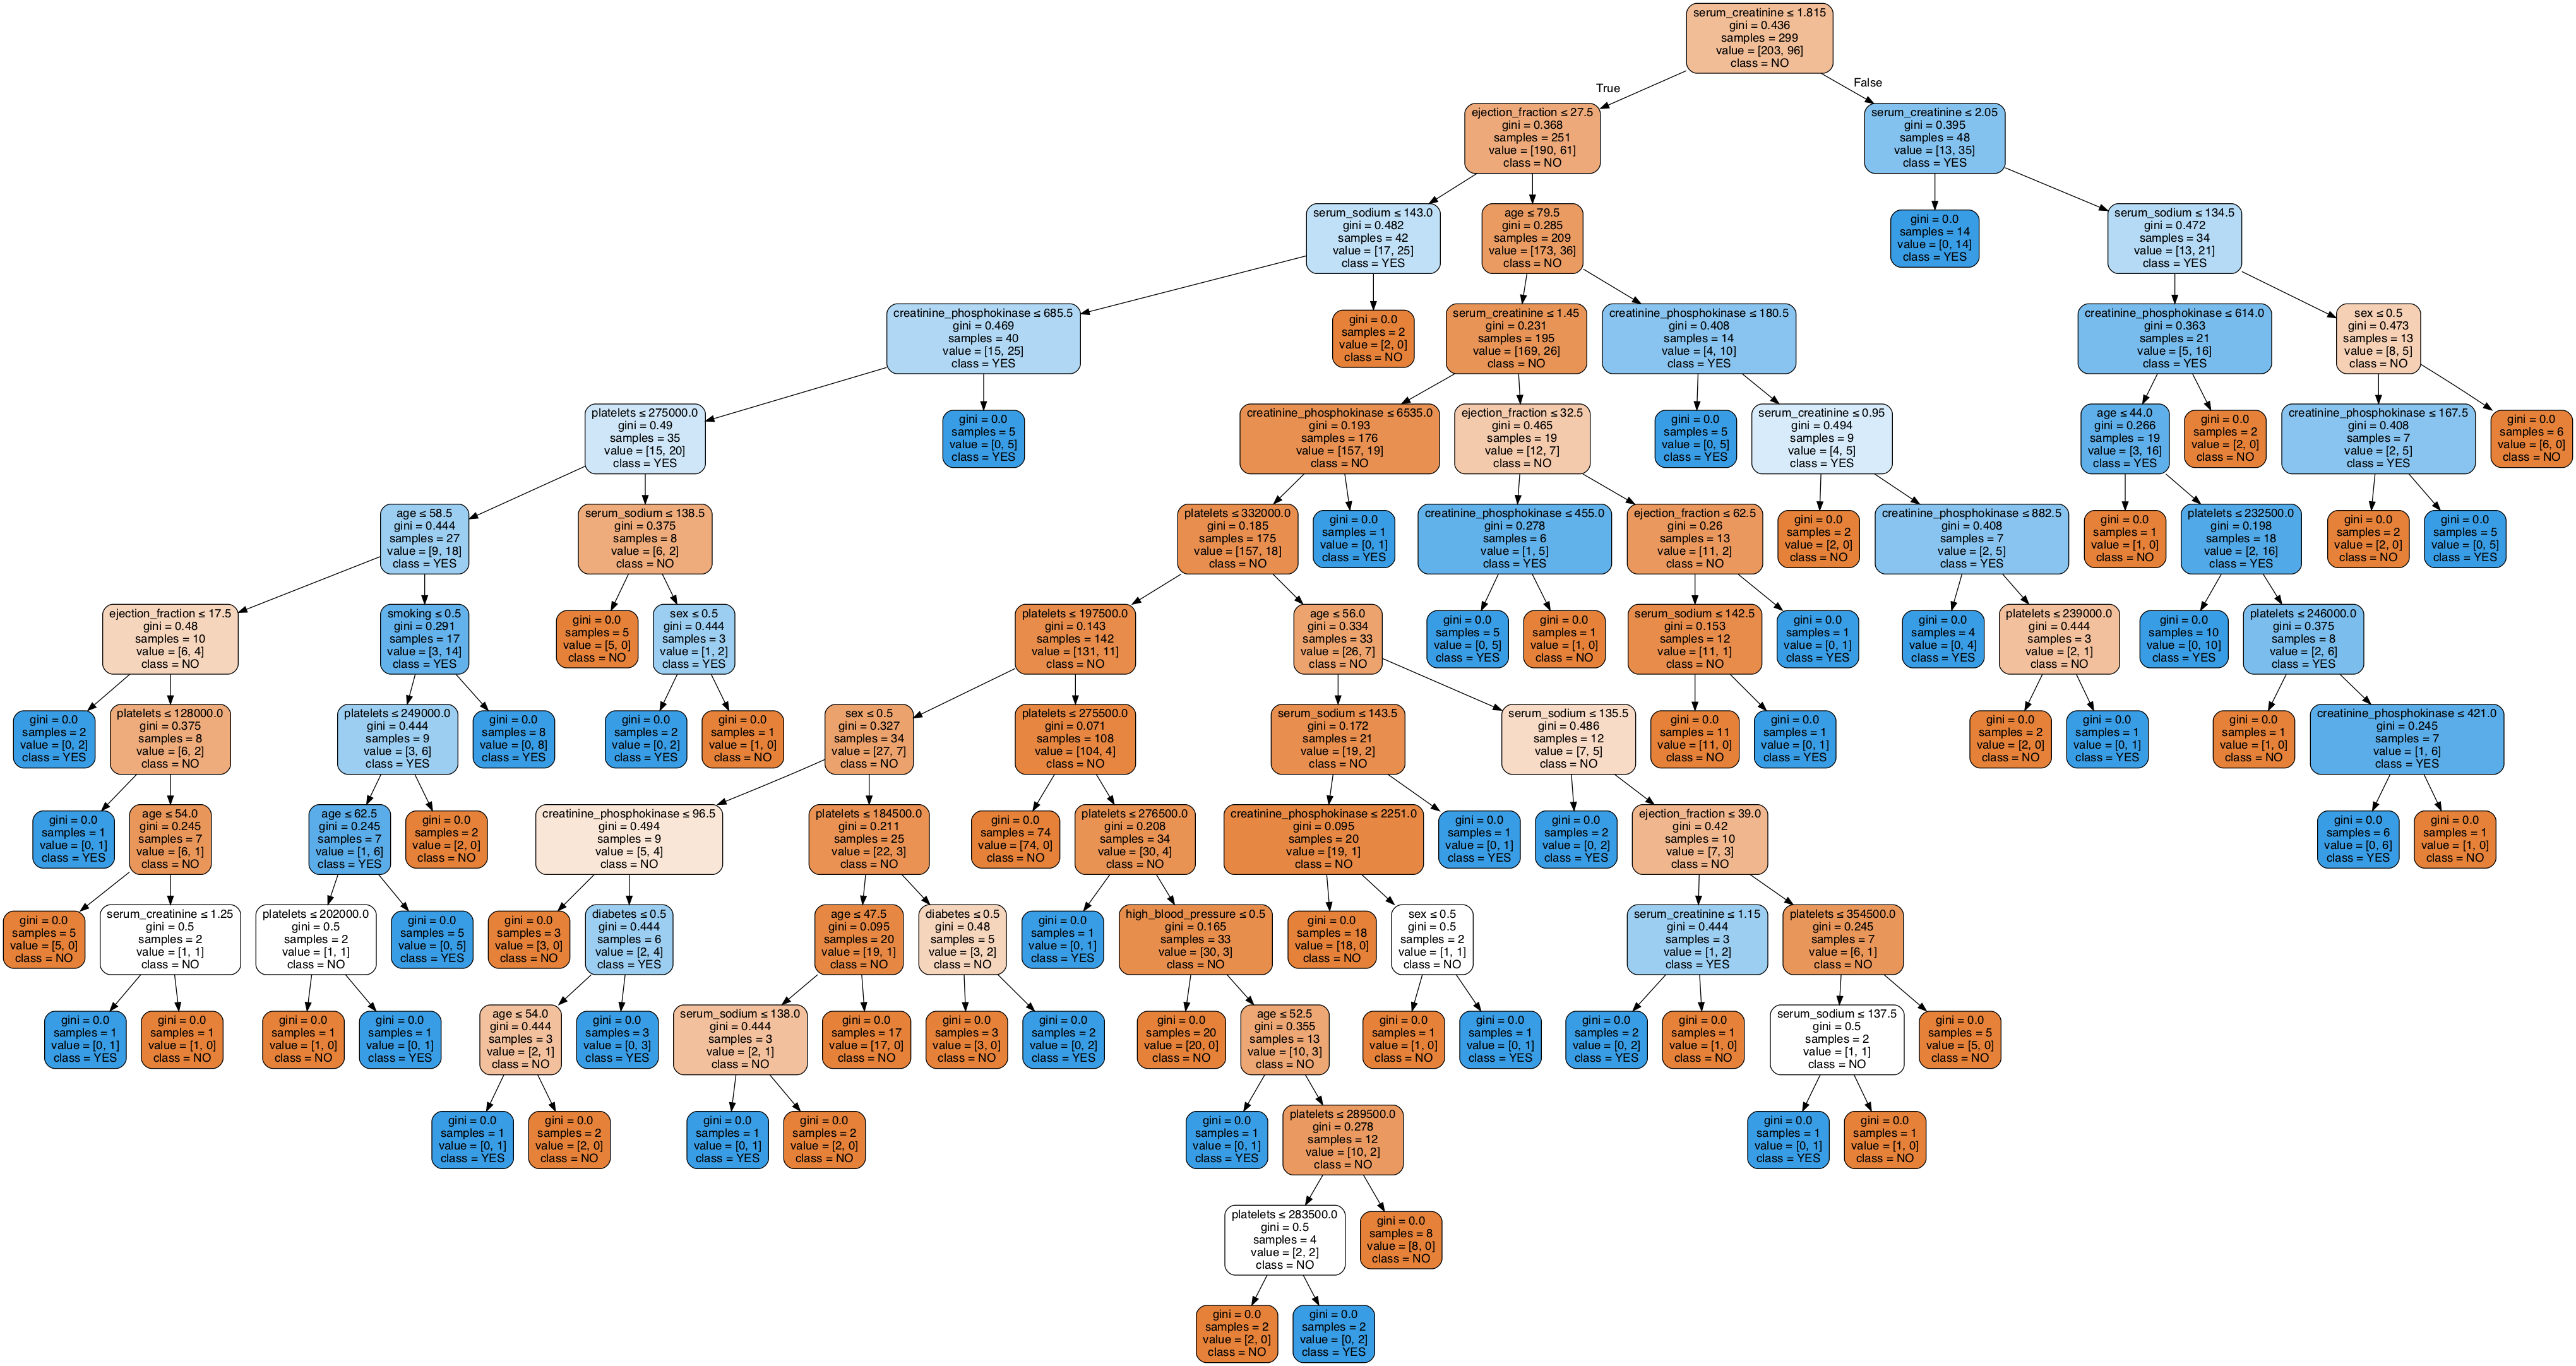

In [46]:
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns,class_names = ["NO", "YES"]) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [47]:
print(cross_val_score(gini_model, X, y, cv=5))

[0.63333333 0.71666667 0.66666667 0.71666667 0.66101695]


This model shows the same issues as the previous two models and performs about as well as the preceding ones. 

In [48]:
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)
entr_model2.fit(X, y)
y_pred = entr_model2.predict(X)
y_pred = pd.Series(y_pred)
entr_model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

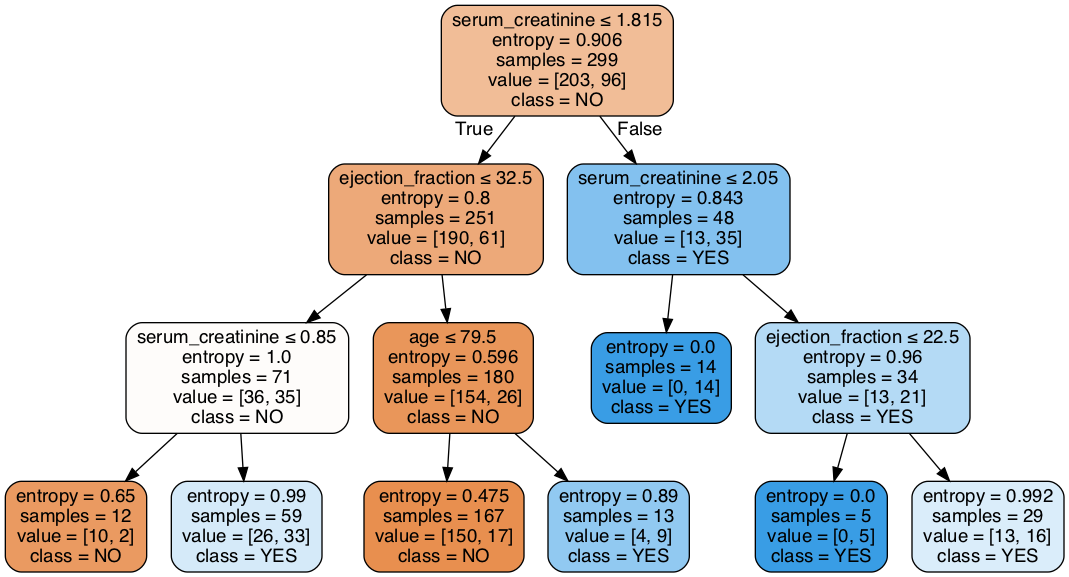

In [49]:
dot_data = StringIO()
tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The most important variables in characterizing this model are serum creatinine levels, ejection fraction and age. 

In [50]:
print(cross_val_score(entr_model2, X, y, cv=8))

[0.81578947 0.71052632 0.63157895 0.7027027  0.67567568 0.78378378
 0.78378378 0.75675676]


In [51]:
import statistics 

cv_score4 = cross_val_score(entr_model2, X, y, cv=8)
statistics.mean(cv_score4)

0.732574679943101

This model performs about as well as the random forest model and is less computationally expensive. The model I would therefore recommend for this analysis is the decision tree model with a constrained depth.  

It appears that the most important features when analyzing health outcomes for these patients is serum creatinine levels, ejection fraction, age, platelet levels, creatinine phosphokinase levels, and serum sodium levels. 